After cleaning the dataset of each species and removing the duplicate measurements for the same trait in the same observation, I now perform again the observation of the different plant growth forms for each species, to see what comes out.

After the observation, I manually manipulate the dataset in order to eliminate clear errors ("yes", "no" etc) and put some obvious forms together (e.g. "Herb" goes with "herb" that goes with "H", or "Herbaceous Monocotyl" goes with "herbaceous monocot".)

https://nc.iucnredlist.org/redlist/content/attachment_files/nov_2013_plant_growth_forms_classification_scheme.pdf

I used this to group things together

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns

In [4]:
with open('./support_files/trait_id_list.txt', 'r') as openfile:
    trait_ids = openfile.read().splitlines()

print(f"There are {len(trait_ids)} traits in total\n")

#mapping them to int because they were read as strings
trait_ids = list(map(lambda x : int(x), trait_ids))

There are 16 traits in total



In [2]:
#specifing encoding='latin' is necessary or you get an error
dac_glo_cleaned_df = pd.read_csv('./support_files/dac_glo_cleaned_df.txt', sep='\t', encoding='latin')
ach_mil_cleaned_df = pd.read_csv('./support_files/ach_mil_cleaned_df.txt', sep='\t', encoding='latin')
tri_pra_cleaned_df = pd.read_csv('./support_files/tri_pra_cleaned_df.txt', sep='\t', encoding='latin')


In [5]:
dac_glo_cleaned_df.head()

,Unnamed: 0,AccSpeciesName,ObservationID,TraitID,TraitName,DataName,StdValue,UnitName
0,9,Dactylis glomerata,19150,13,Leaf carbon (C) content per leaf dry mass,Leaf carbon content per dry mass,458.5,mg/g
1,15,Dactylis glomerata,19194,13,Leaf carbon (C) content per leaf dry mass,Leaf carbon content per dry mass,416.2,mg/g
2,20,Dactylis glomerata,19216,14,Leaf nitrogen (N) content per leaf dry mass,Leaf nitrogen content per dry mass (Nmass),27.8,mg/g
3,29,Dactylis glomerata,19514,14,Leaf nitrogen (N) content per leaf dry mass,Leaf nitrogen content per dry mass (Nmass),15.91335,mg/g
4,28,Dactylis glomerata,19514,42,Plant growth form,Plant growth form,Herbaceous Monocot,NaN


##### Dactylis Glomerata

Total number of PGFs:  26


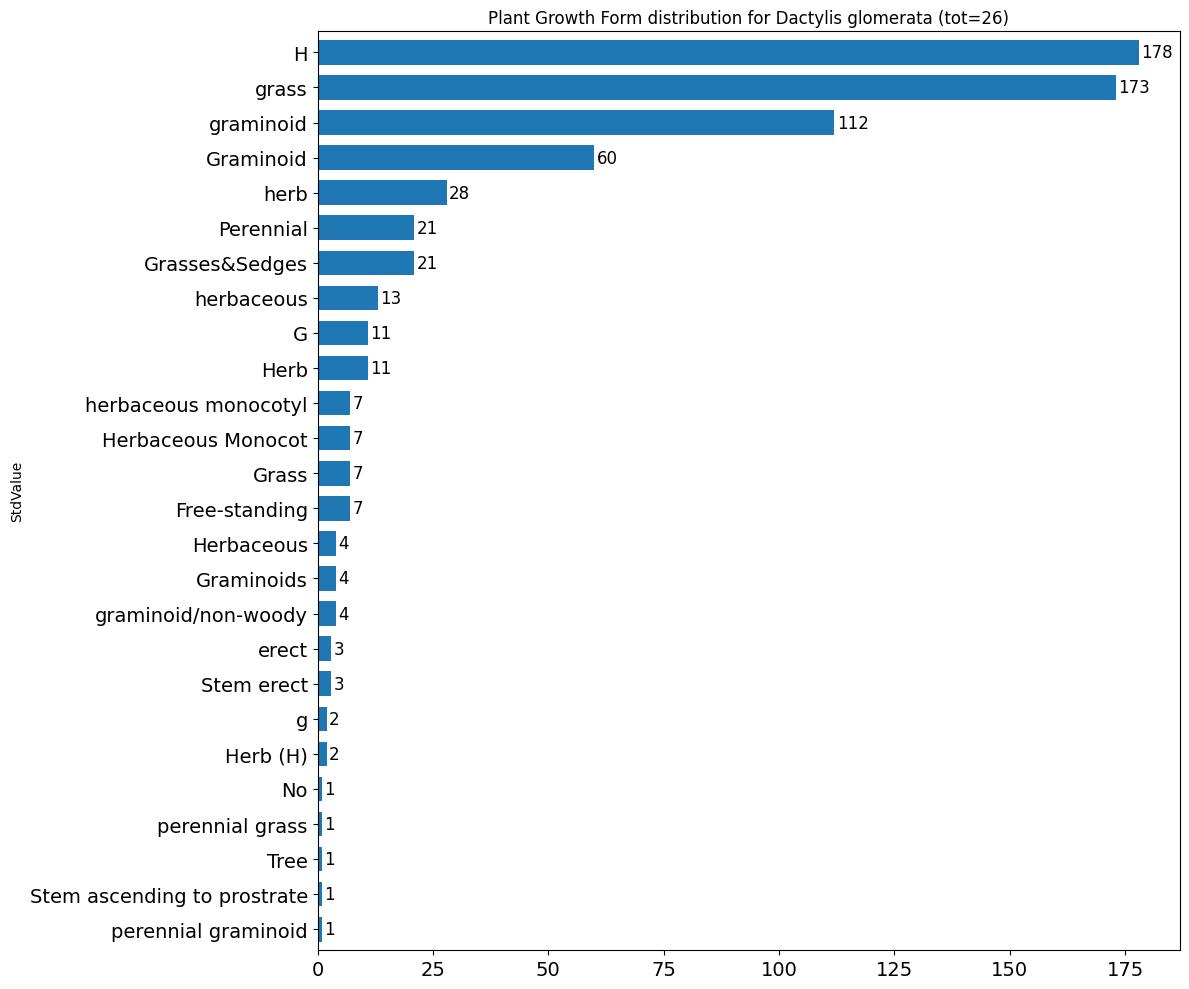

In [6]:
#find unique values of plant growth form for each species

dac_glo_growth_forms_COUNT = dac_glo_cleaned_df[dac_glo_cleaned_df['TraitID'] == 42]['StdValue'].value_counts()

print("Total number of PGFs: ", len(dac_glo_growth_forms_COUNT))

# print(dac_glo_growth_forms_COUNT)

fig, ax = plt.subplots(figsize=(12, 10))  # Increase figure size to avoid overlap


dac_glo_growth_forms_COUNT.sort_values().plot(kind='barh', 
                                              ax=ax,
                                              width= 0.7,
                                              title=f'Plant Growth Form distribution for Dactylis glomerata (tot={len(dac_glo_growth_forms_COUNT)})', 
                                              fontsize=14)
#very weird values in here, like 0.96 and 1

# Add values next to bars
for i, v in enumerate(dac_glo_growth_forms_COUNT.sort_values()):
    ax.text(v + 0.5, i, str(v), color='black', va='center', fontsize=12)

# Optional: Adjust layout to fit everything
plt.tight_layout()

plt.show()
fig.savefig('./img/Dactylis_glomerata_plant_growth_forms_after_cleaning.pdf', bbox_inches="tight")


In [61]:
dac_glo_cleaned_df_copy = dac_glo_cleaned_df.copy()

dac_glo_cleaned_df_copy['StdValue'] = dac_glo_cleaned_df_copy['StdValue'].apply(lambda x : x.lower() if isinstance(x, str) else x)

dac_glo_cleaned_df_copy['StdValue'] = dac_glo_cleaned_df_copy['StdValue'].replace('grass', 'graminoid')
dac_glo_cleaned_df_copy['StdValue'] = dac_glo_cleaned_df_copy['StdValue'].replace('g', 'graminoid')
dac_glo_cleaned_df_copy['StdValue'] = dac_glo_cleaned_df_copy['StdValue'].replace('grasses&sedges', 'graminoid')
dac_glo_cleaned_df_copy['StdValue'] = dac_glo_cleaned_df_copy['StdValue'].replace('graminoids', 'graminoid')
dac_glo_cleaned_df_copy['StdValue'] = dac_glo_cleaned_df_copy['StdValue'].replace('graminoid/non-woody', 'graminoid')
dac_glo_cleaned_df_copy['StdValue'] = dac_glo_cleaned_df_copy['StdValue'].replace('perennial graminoid', 'graminoid')
dac_glo_cleaned_df_copy['StdValue'] = dac_glo_cleaned_df_copy['StdValue'].replace('perennial grass', 'graminoid')


dac_glo_cleaned_df_copy['StdValue'] = dac_glo_cleaned_df_copy['StdValue'].replace('h', 'herb')
dac_glo_cleaned_df_copy['StdValue'] = dac_glo_cleaned_df_copy['StdValue'].replace('herbaceous', 'herb')
dac_glo_cleaned_df_copy['StdValue'] = dac_glo_cleaned_df_copy['StdValue'].replace('herbaceous monocot', 'herb')
dac_glo_cleaned_df_copy['StdValue'] = dac_glo_cleaned_df_copy['StdValue'].replace('herbaceous monocotyl', 'herb')
dac_glo_cleaned_df_copy['StdValue'] = dac_glo_cleaned_df_copy['StdValue'].replace('herb (h)', 'herb')

i = dac_glo_cleaned_df_copy[(dac_glo_cleaned_df_copy['StdValue'] == 'no')].index
dac_glo_cleaned_df_copy = dac_glo_cleaned_df_copy.drop(i)

dac_glo_cleaned_df_copy


,Unnamed: 0,AccSpeciesName,ObservationID,TraitID,TraitName,DataName,StdValue,UnitName
0,9,Dactylis glomerata,19150,13,Leaf carbon (C) content per leaf dry mass,Leaf carbon content per dry mass,458.5,mg/g
1,15,Dactylis glomerata,19194,13,Leaf carbon (C) content per leaf dry mass,Leaf carbon content per dry mass,416.2,mg/g
2,20,Dactylis glomerata,19216,14,Leaf nitrogen (N) content per leaf dry mass,Leaf nitrogen content per dry mass (Nmass),27.8,mg/g
3,29,Dactylis glomerata,19514,14,Leaf nitrogen (N) content per leaf dry mass,Leaf nitrogen content per dry mass (Nmass),15.91335,mg/g
4,28,Dactylis glomerata,19514,42,Plant growth form,Plant growth form,herb,NaN
...,...,...,...,...,...,...,...,...
5206,114689,Dactylis glomerata,6487801,3106,Plant height vegetative,Plant height vegetative,0.968666666666667,m
5207,114702,Dactylis glomerata,6487802,14,Leaf nitrogen (N) content per leaf dry mass,Leaf nitrogen content per dry mass (Nmass),19.9816165015384,mg/g
5208,114701,Dactylis glomerata,6487802,47,Leaf dry mass per leaf fresh mass (leaf dry ma...,Leaf dry matter content per leaf water-saturat...,0.262049616066155,g/g
5209,116531,Dactylis glomerata,6487802,50,Leaf nitrogen (N) content per leaf area,Leaf nitrogen content per area (Narea),0.901145146478813,g m-2


Total number of PGFs:  8


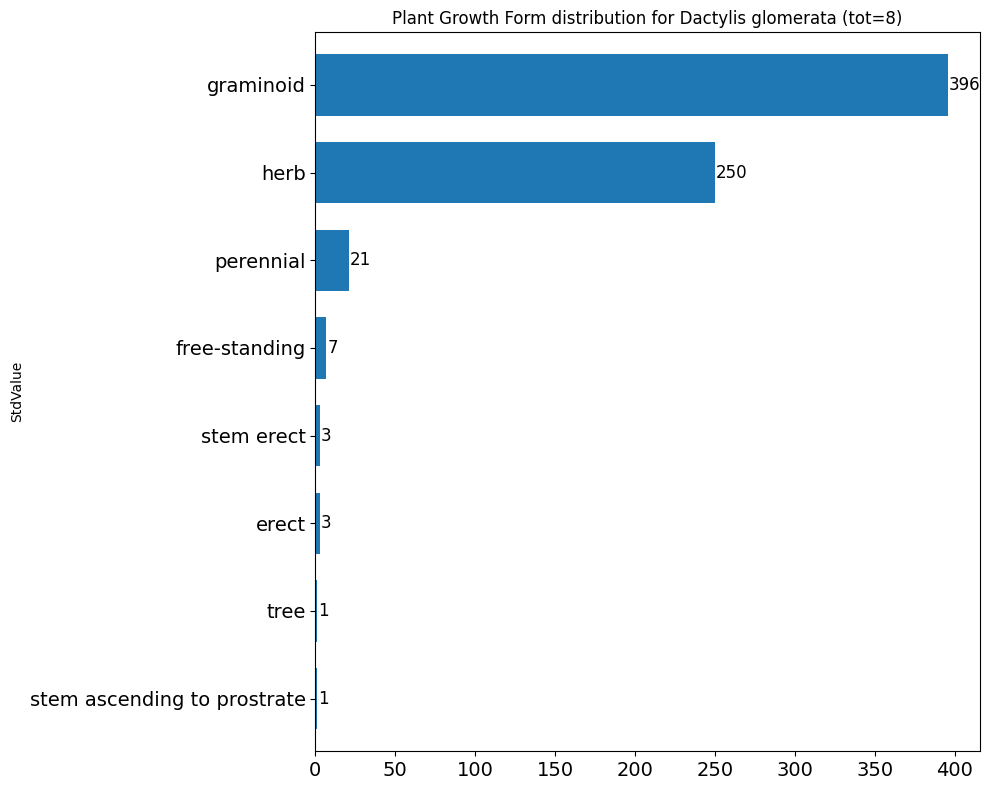

In [41]:
#find unique values of plant growth form for each species

dac_glo_growth_forms_COUNT = dac_glo_cleaned_df_copy[dac_glo_cleaned_df_copy['TraitID'] == 42]['StdValue'].value_counts()

print("Total number of PGFs: ", len(dac_glo_growth_forms_COUNT))

# print(dac_glo_growth_forms_COUNT)

fig, ax = plt.subplots(figsize=(10, 8))  # Increase figure size to avoid overlap


dac_glo_growth_forms_COUNT.sort_values().plot(kind='barh', 
                                              ax=ax,
                                              width= 0.7,
                                              title=f'Plant Growth Form distribution for Dactylis glomerata (tot={len(dac_glo_growth_forms_COUNT)})', 
                                              fontsize=14)
#very weird values in here, like 0.96 and 1

# Add values next to bars
for i, v in enumerate(dac_glo_growth_forms_COUNT.sort_values()):
    ax.text(v + 0.5, i, str(v), color='black', va='center', fontsize=12)

# Optional: Adjust layout to fit everything
plt.tight_layout()

plt.show()
fig.savefig('./img/v2_Dactylis_glomerata_plant_growth_forms_after_cleaning.pdf', bbox_inches="tight")

##### Achillea Millefolium

Total number of PGFs:  23


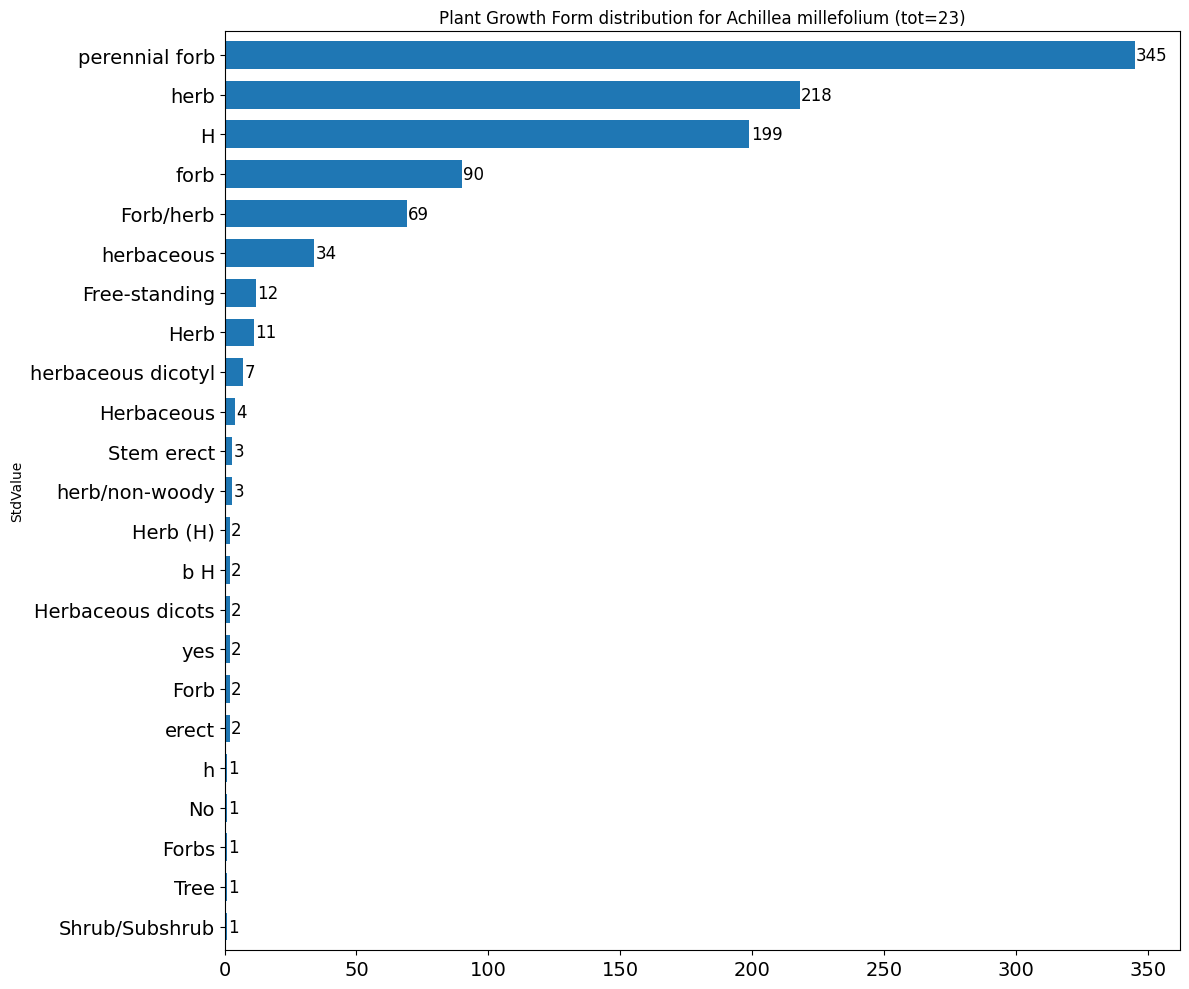

In [16]:
#find unique values of plant growth form for each species

ach_mil_growth_forms_COUNT = ach_mil_cleaned_df[ach_mil_cleaned_df['TraitID'] == 42]['StdValue'].value_counts()

print("Total number of PGFs: ", len(ach_mil_growth_forms_COUNT))

# print(dac_glo_growth_forms_COUNT)

fig, ax = plt.subplots(figsize=(12, 10))  # Increase figure size to avoid overlap


ach_mil_growth_forms_COUNT.sort_values().plot(kind='barh', 
                                              ax=ax,
                                              width= 0.7,
                                              title=f'Plant Growth Form distribution for Achillea millefolium (tot={len(ach_mil_growth_forms_COUNT)})', 
                                              fontsize=14)
#very weird values in here, like 0.96 and 1

# Add values next to bars
for i, v in enumerate(ach_mil_growth_forms_COUNT.sort_values()):
    ax.text(v + 0.5, i, str(v), color='black', va='center', fontsize=12)

# Optional: Adjust layout to fit everything
plt.tight_layout()

plt.show()
fig.savefig('./img/Achillea_millefolium_plant_growth_forms_after_cleaning.pdf', bbox_inches="tight")

In [63]:
ach_mil_cleaned_df_copy = ach_mil_cleaned_df.copy()

ach_mil_cleaned_df_copy['StdValue'] = ach_mil_cleaned_df_copy['StdValue'].map(lambda x : x.lower() if isinstance(x, str) else x)

ach_mil_cleaned_df_copy['StdValue'] = ach_mil_cleaned_df_copy['StdValue'].replace('perennial forb', 'herb')
ach_mil_cleaned_df_copy['StdValue'] = ach_mil_cleaned_df_copy['StdValue'].replace('h', 'herb')
ach_mil_cleaned_df_copy['StdValue'] = ach_mil_cleaned_df_copy['StdValue'].replace('forb', 'herb')
ach_mil_cleaned_df_copy['StdValue'] = ach_mil_cleaned_df_copy['StdValue'].replace('forb/herb', 'herb')
ach_mil_cleaned_df_copy['StdValue'] = ach_mil_cleaned_df_copy['StdValue'].replace('herbaceous', 'herb')
ach_mil_cleaned_df_copy['StdValue'] = ach_mil_cleaned_df_copy['StdValue'].replace('herbaceous dicotyl', 'herb')
ach_mil_cleaned_df_copy['StdValue'] = ach_mil_cleaned_df_copy['StdValue'].replace('perennial forb', 'herb')
ach_mil_cleaned_df_copy['StdValue'] = ach_mil_cleaned_df_copy['StdValue'].replace('herb/non-woody', 'herb')
ach_mil_cleaned_df_copy['StdValue'] = ach_mil_cleaned_df_copy['StdValue'].replace('b h', 'herb')
ach_mil_cleaned_df_copy['StdValue'] = ach_mil_cleaned_df_copy['StdValue'].replace('herb (h)', 'herb')
ach_mil_cleaned_df_copy['StdValue'] = ach_mil_cleaned_df_copy['StdValue'].replace('herbaceous dicots', 'herb')
ach_mil_cleaned_df_copy['StdValue'] = ach_mil_cleaned_df_copy['StdValue'].replace('forbs', 'herb')


i = ach_mil_cleaned_df_copy[(ach_mil_cleaned_df_copy['StdValue']=='no')].index
ach_mil_cleaned_df_copy = ach_mil_cleaned_df_copy.drop(i)
i = ach_mil_cleaned_df_copy[(ach_mil_cleaned_df_copy['StdValue']=='yes')].index
ach_mil_cleaned_df_copy = ach_mil_cleaned_df_copy.drop(i)






Total number of PGFs:  6


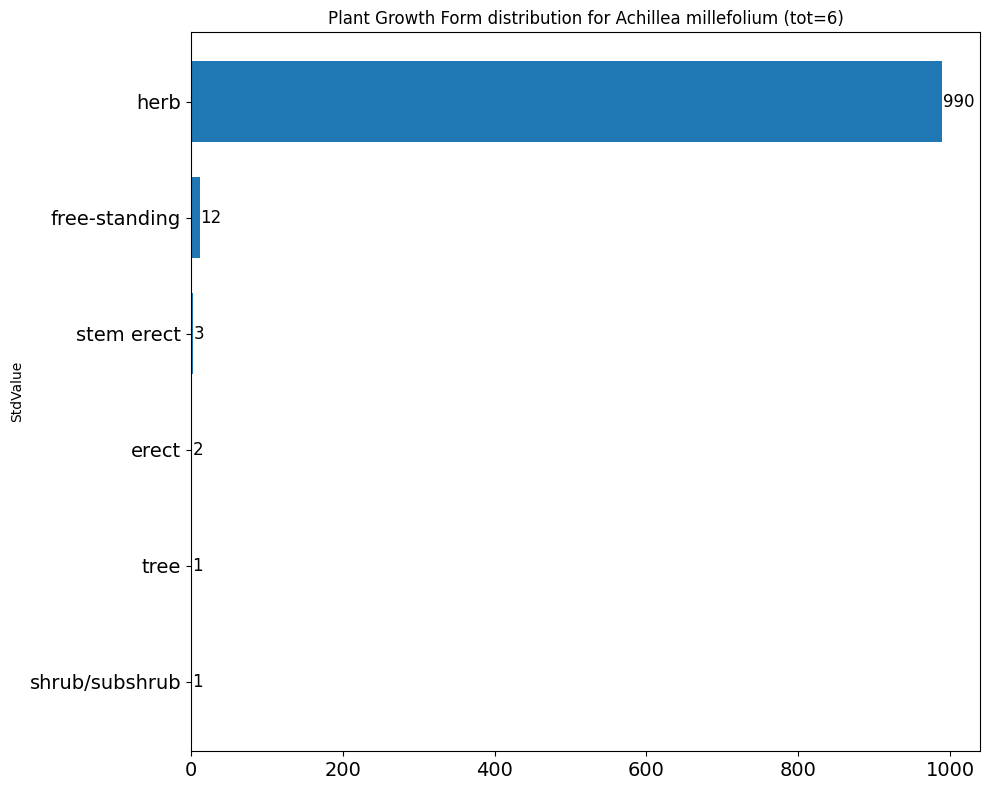

In [64]:
#find unique values of plant growth form for each species

ach_mil_growth_forms_COUNT = ach_mil_cleaned_df_copy[ach_mil_cleaned_df_copy['TraitID'] == 42]['StdValue'].value_counts()

print("Total number of PGFs: ", len(ach_mil_growth_forms_COUNT))

# print(dac_glo_growth_forms_COUNT)

fig, ax = plt.subplots(figsize=(10, 8))  # Increase figure size to avoid overlap


ach_mil_growth_forms_COUNT.sort_values().plot(kind='barh', 
                                              ax=ax,
                                              width= 0.7,
                                              title=f'Plant Growth Form distribution for Achillea millefolium (tot={len(ach_mil_growth_forms_COUNT)})', 
                                              fontsize=14)
#very weird values in here, like 0.96 and 1

# Add values next to bars
for i, v in enumerate(ach_mil_growth_forms_COUNT.sort_values()):
    ax.text(v + 0.5, i, str(v), color='black', va='center', fontsize=12)

# Optional: Adjust layout to fit everything
plt.tight_layout()

plt.show()
fig.savefig('./img/v2_Achillea_millefolium_plant_growth_forms_after_cleaning.pdf', bbox_inches="tight")

##### Trifolium Pratense

Total number of PGFs:  26


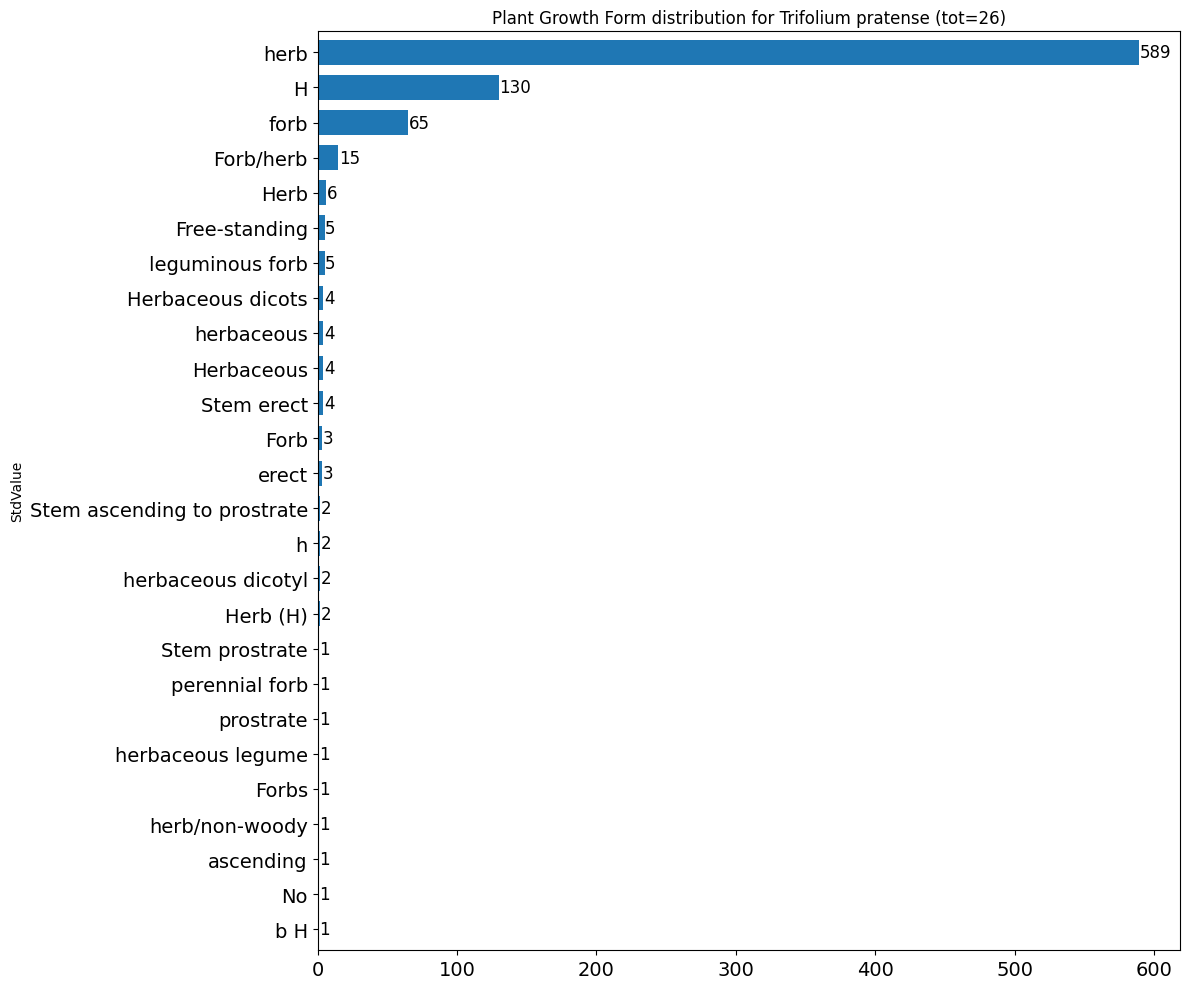

In [17]:
#find unique values of plant growth form for each species

tri_pra_growth_forms_COUNT = tri_pra_cleaned_df[tri_pra_cleaned_df['TraitID'] == 42]['StdValue'].value_counts()

print("Total number of PGFs: ", len(tri_pra_growth_forms_COUNT))

# print(dac_glo_growth_forms_COUNT)

fig, ax = plt.subplots(figsize=(12, 10))  # Increase figure size to avoid overlap


tri_pra_growth_forms_COUNT.sort_values().plot(kind='barh', 
                                              ax=ax,
                                              width= 0.7,
                                              title=f'Plant Growth Form distribution for Trifolium pratense (tot={len(tri_pra_growth_forms_COUNT)})', 
                                              fontsize=14)
#very weird values in here, like 0.96 and 1

# Add values next to bars
for i, v in enumerate(tri_pra_growth_forms_COUNT.sort_values()):
    ax.text(v + 0.5, i, str(v), color='black', va='center', fontsize=12)

# Optional: Adjust layout to fit everything
plt.tight_layout()

plt.show()
fig.savefig('./img/Trifolium_pratense_plant_growth_forms_after_cleaning.pdf', bbox_inches="tight")

In [78]:
tri_pra_cleaned_df_copy = tri_pra_cleaned_df.copy()

tri_pra_cleaned_df_copy['StdValue'] = tri_pra_cleaned_df_copy['StdValue'].map(lambda x : x.lower() if isinstance(x, str) else x)

tri_pra_cleaned_df_copy['StdValue'] = tri_pra_cleaned_df_copy['StdValue'].replace('h', 'herb')
tri_pra_cleaned_df_copy['StdValue'] = tri_pra_cleaned_df_copy['StdValue'].replace('forb', 'herb')
tri_pra_cleaned_df_copy['StdValue'] = tri_pra_cleaned_df_copy['StdValue'].replace('forb/herb', 'herb')
tri_pra_cleaned_df_copy['StdValue'] = tri_pra_cleaned_df_copy['StdValue'].replace('leguminous forb', 'herb')
tri_pra_cleaned_df_copy['StdValue'] = tri_pra_cleaned_df_copy['StdValue'].replace('herbaceous', 'herb')
tri_pra_cleaned_df_copy['StdValue'] = tri_pra_cleaned_df_copy['StdValue'].replace('herbaceous dicots', 'herb')
tri_pra_cleaned_df_copy['StdValue'] = tri_pra_cleaned_df_copy['StdValue'].replace('herb (h)', 'herb')
tri_pra_cleaned_df_copy['StdValue'] = tri_pra_cleaned_df_copy['StdValue'].replace('herbaceous dicotyl', 'herb')
tri_pra_cleaned_df_copy['StdValue'] = tri_pra_cleaned_df_copy['StdValue'].replace('perennial forb', 'herb')
tri_pra_cleaned_df_copy['StdValue'] = tri_pra_cleaned_df_copy['StdValue'].replace('forbs', 'herb')
tri_pra_cleaned_df_copy['StdValue'] = tri_pra_cleaned_df_copy['StdValue'].replace('b h', 'herb')
tri_pra_cleaned_df_copy['StdValue'] = tri_pra_cleaned_df_copy['StdValue'].replace('herb/non-woody', 'herb')
tri_pra_cleaned_df_copy['StdValue'] = tri_pra_cleaned_df_copy['StdValue'].replace('herbaceous legume', 'herb')

i = tri_pra_cleaned_df_copy[(tri_pra_cleaned_df_copy['StdValue'] == 'yes')].index
tri_pra_cleaned_df_copy = tri_pra_cleaned_df_copy.drop(i)
i = tri_pra_cleaned_df_copy[(tri_pra_cleaned_df_copy['StdValue'] == 'no')].index
tri_pra_cleaned_df_copy = tri_pra_cleaned_df_copy.drop(i)


Total number of PGFs:  8


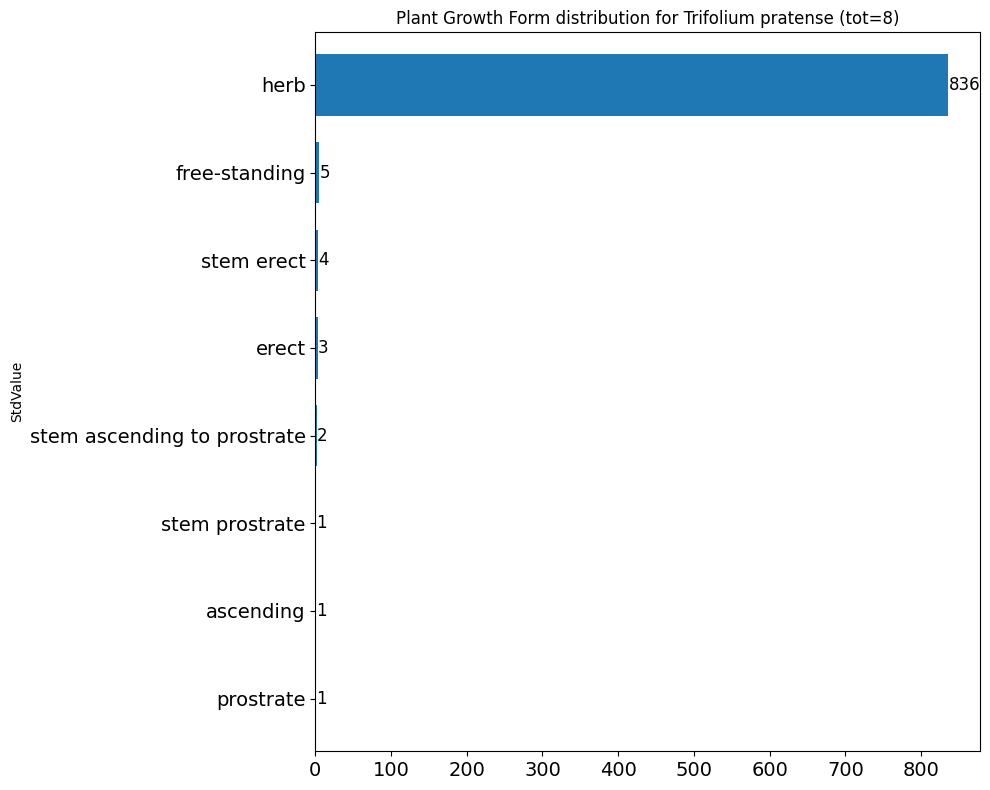

In [79]:
#find unique values of plant growth form for each species

tri_pra_growth_forms_COUNT = tri_pra_cleaned_df_copy[tri_pra_cleaned_df_copy['TraitID'] == 42]['StdValue'].value_counts()

print("Total number of PGFs: ", len(tri_pra_growth_forms_COUNT))

# print(dac_glo_growth_forms_COUNT)

fig, ax = plt.subplots(figsize=(10, 8))  # Increase figure size to avoid overlap


tri_pra_growth_forms_COUNT.sort_values().plot(kind='barh', 
                                              ax=ax,
                                              width= 0.7,
                                              title=f'Plant Growth Form distribution for Trifolium pratense (tot={len(tri_pra_growth_forms_COUNT)})', 
                                              fontsize=14)
#very weird values in here, like 0.96 and 1

# Add values next to bars
for i, v in enumerate(tri_pra_growth_forms_COUNT.sort_values()):
    ax.text(v + 0.5, i, str(v), color='black', va='center', fontsize=12)

# Optional: Adjust layout to fit everything
plt.tight_layout()

plt.show()
fig.savefig('./img/v2_Trifolium_pratense_plant_growth_forms_after_cleaning.pdf', bbox_inches="tight")